# **Tercer conjunto de tareas a realizar**

## Paquetes necesarios e inicializaciones

Para la realización de las siguientes tareas, se va a utilizar el mismo *enviroment* de Python llamado VC_P1 creado en el [primer conjunto de tareas](../VC_P1/Exercises_P1.ipynb) y modificado después en el [segundo conjunto de tareas](./VC_P2/Exercises_P2.ipynb), la única dependencia adicional que se ha de descargar es la que viene dada por el paquete **scikit-learn** y **seaborn**.

## TAREA 1

En la primera tarea, el reto o tarea consiste en determinar la cantidad de dinero y monedas presentes en la imagen. Una extensión válida sería la presencia de objetos que no sean monedas en la imagen anañizada.

TAREA: Los ejemplos ilustrativos anteriores permiten saber el número de monedas presentes en la imagen. ¿Cómo saber la cantidad de dinero presente en ella? Sugerimos identificar de forma interactiva (por ejemplo haciendo clic en la imagen) una moneda de un valor determinado en la imagen (por ejemplo de 1€). Tras obtener esa información y las dimensiones en milímetros de las distintas monedas, realiza una propuesta para estimar la cantidad de dinero en la imagen. Muestra la cuenta de monedas y dinero sobre la imagen. No hay restricciones sobre utilizar medidas geométricas o de color. 

Una vez resuelto el reto con la imagen ideal proporcionada, captura una o varias imágenes con monedas. Aplica el mismo esquema, tras identificar la moneda del valor determinado, calcula el dinero presente en la imagen. ¿Funciona correctamente? ¿Se observan problemas?

Nota: Para establecer la correspondencia entre píxeles y milímetros, comentar que la moneda de un euro tiene un diámetro de 23.25 mm. la de 50 céntimos de 24.35, la de 20 céntimos de 22.25, etc. 

Extras: Considerar que la imagen pueda contener objetos que no son monedas y/o haya solape entre las monedas. Demo en vivo. 

## TAREA 2

Para la segunda tarea, se proporcionan imágenes de tres clases de objetos recogidos en playas canarias: fragmentos plásticos, *pellets* y alquitrán. Para cada categoría se proporciona una imagen completa y una subimagen de la misma. Las dos primeras categorías se consideran microplásticos cuando miden menos de 5mm, mientras que la tercera es muy habitual encontrarlas en playas canarias. Observar que dado que cada imagen contiene muestras de una única categoría, disponen de un conjunto de datos anotado. La tarea propuesta consiste en primer término, hacer uso de las imágenes proporcionadas, extraer de forma automatizada las partículas e identificar patrones en sus características geométricas y de apariencia que puedan permitir la clasificación de las partículas en dichas imágenes. Las características que determinen se usarán para analizar la imagen de test proporcionada, con presencia de muestras de las tres clases. El resultado obtenido debe mostrarse por medio las métricas mostradas en el cuaderno, incluyendo la matriz de confusión, donde se comparan las anotaciones con las predicciones.

![Confusión](../VC_P3/Resources/MatrizConfu.png)  
*Ejemplo de matriz de confusión*

A la hora de considerar posibles características geométricas, como punto de partida para la extracción de descriptores de las partículas, se proporciona enlace al trabajo [SMACC: A System for Microplastics Automatic Counting and Classification](https://doi.org/10.1109/ACCESS.2020.2970498) en el que se adoptan algunas propiedades geométricas para dicho fin. De forma resumida, las características geométricas utilizadas en dicho trabajo fueron:

- Área en píxeles (A)
- Perímetro en píxeles (P)
- Compacidad (relación del cuadrado del perímetro con el área C=P^2/A)
- Relación del área de la partícula con el área del contenedor que la contiene
- Relación del ancho y el alto del contenedor
- Relación entre los ejes de la elipse ajustada
- Definido el centroide, relación entre las distancias menor y mayor al contorno

En relación a la segmentación de las partículas, una probable primera observación es que la aplicación del umbralizado para separarlas del fondo, es delicada. Preprocesamiento como suavizar la imagen de entrada o reducir su tamaño, o aplicar heurísticas basadas en el tamaño mínimo y máximo de los contornos localizados, y la distancia mínima entre ellos, pueden ayudar a filtrar falsas detecciones, pero a pesar de ello, será un desafío obtener una separación perfecta para todas las imágenes con la misma estrategia. Añadir, que la imagen de fragmentos contiene unas 80 partículas, la de *pellets* unas 55 y la de alquitrán unas 54.

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from skimage.feature import graycomatrix, graycoprops
from pathlib import Path

⚠️ Sobrescribiendo ..\VC_P3\Resources\Task2\Augmented\FRA_1.png
⚠️ Sobrescribiendo ..\VC_P3\Resources\Task2\Augmented\FRA_2.png
⚠️ Sobrescribiendo ..\VC_P3\Resources\Task2\Augmented\FRA_5.png
⚠️ Sobrescribiendo ..\VC_P3\Resources\Task2\Augmented\FRA_6.png
⚠️ Sobrescribiendo ..\VC_P3\Resources\Task2\Augmented\PEL_1.png
⚠️ Sobrescribiendo ..\VC_P3\Resources\Task2\Augmented\PEL_2.png
⚠️ Sobrescribiendo ..\VC_P3\Resources\Task2\Augmented\PEL_5.png
⚠️ Sobrescribiendo ..\VC_P3\Resources\Task2\Augmented\PEL_6.png
⚠️ Sobrescribiendo ..\VC_P3\Resources\Task2\Augmented\TAR_1.png
⚠️ Sobrescribiendo ..\VC_P3\Resources\Task2\Augmented\TAR_2.png
⚠️ Sobrescribiendo ..\VC_P3\Resources\Task2\Augmented\TAR_5.png
⚠️ Sobrescribiendo ..\VC_P3\Resources\Task2\Augmented\TAR_6.png
✅ Imágenes aumentadas generadas y sobrescritas si existían.
✅ RandomForest entrenado.

🔹 Accuracy: 59.79%

Matriz de confusión:
     FRA  PEL  TAR
FRA   43    3    3
PEL   19   15    0
TAR   12    2    0


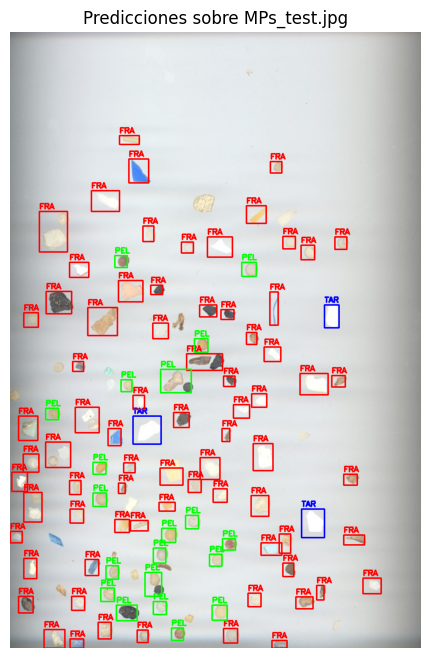

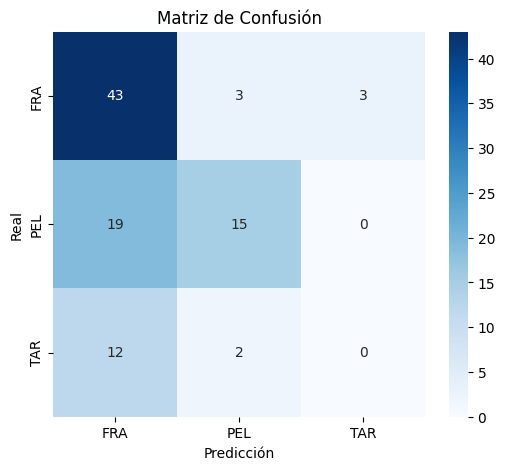

In [56]:
# ============================================================
# 1️⃣ RUTAS DE IMÁGENES
# ============================================================
image_paths = {
    "FRA": [
        "../VC_P3/Resources/Task2/FRA.png",
        "../VC_P3/Resources/Task2/fragment-03-olympus-10-01-2020.JPG"
    ],
    "PEL": [
        "../VC_P3/Resources/Task2/PEL.png",
        "../VC_P3/Resources/Task2/pellet-03-olympus-10-01-2020.JPG"
    ],
    "TAR": [
        "../VC_P3/Resources/Task2/TAR.png",
        "../VC_P3/Resources/Task2/tar-03-olympus-10-01-2020.JPG"
    ]
}

output_dir = "../VC_P3/Resources/Task2/Augmented/"
Path(output_dir).mkdir(parents=True, exist_ok=True)

# ============================================================
# 2️⃣ AUMENTACIÓN DE IMÁGENES (manteniendo color)
# ============================================================
def generate_images(image):
    # Solo original y flips mínimos si quieres
    more = [image, cv2.flip(image, 1)]
    return more


# Generar imágenes aumentadas
for label, paths in image_paths.items():
    index = 0
    for path in paths:
        image = cv2.imread(path)
        if image is None:
            continue
        aug_images = generate_images(image)
        for i, img in enumerate(aug_images):
            out_path = Path(output_dir) / f"{label}_{index*4+i+1}.png"
            if out_path.exists():
                print(f"⚠️ Sobrescribiendo {out_path}")
            cv2.imwrite(str(out_path), img)  # Sobrescribe automáticamente
        index += 1

print("✅ Imágenes aumentadas generadas y sobrescritas si existían.")

# ============================================================
# 3️⃣ EXTRACCIÓN DE CARACTERÍSTICAS
# ============================================================
def area_calculator(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return sum(cv2.contourArea(c) for c in contours)

def perimeter_calculator(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return sum(cv2.arcLength(c, True) for c in contours)

def extract_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    mean_intensity = np.mean(gray)
    std_intensity = np.std(gray)
    mean_hue = np.mean(hsv[:, :, 0])
    mean_sat = np.mean(hsv[:, :, 1])
    mean_val = np.mean(hsv[:, :, 2])

    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        area = perimeter = circularity = aspect_ratio = solidity = 0
    else:
        c = max(contours, key=cv2.contourArea)
        area = cv2.contourArea(c)
        perimeter = cv2.arcLength(c, True)
        x, y, w, h = cv2.boundingRect(c)
        aspect_ratio = w / float(h)
        hull = cv2.convexHull(c)
        hull_area = cv2.contourArea(hull)
        solidity = float(area) / hull_area if hull_area > 0 else 0
        circularity = 4 * np.pi * area / (perimeter ** 2 + 1e-6)

    glcm = graycomatrix(gray, distances=[2], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]

    return [
        mean_intensity, std_intensity,
        mean_hue, mean_sat, mean_val,
        area, perimeter, circularity,
        aspect_ratio, solidity,
        contrast, homogeneity, energy, correlation
    ]

# ============================================================
# 4️⃣ ENTRENAMIENTO DEL RANDOMFOREST
# ============================================================
train_paths = glob.glob(str(Path(output_dir) / "*.png"))
X_train, y_train = [], []

for path in train_paths:
    img = cv2.imread(path)
    if img is None:
        continue
    label = Path(path).stem.split("_")[0].strip().upper()
    X_train.append(extract_features(img))
    y_train.append(label)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

clf = RandomForestClassifier(n_estimators=500, max_depth=25, random_state=42)
clf.fit(X_train_scaled, y_train_enc)

print("✅ RandomForest entrenado.")

# ============================================================
# 5️⃣ CLASIFICADOR HÍBRIDO (REGLAS + RandomForest)
# ============================================================
def predict_hybrid(image, clf, scaler, le, val_thresh=60, circ_thresh=0.8):
    features = extract_features(image)
    mean_val = features[4]      # mean_val
    circularity = features[7]   # circularity

    if mean_val < val_thresh:
        return "TAR"
    elif circularity > circ_thresh:
        return "PEL"
    else:
        scaled = scaler.transform([features])
        pred = clf.predict(scaled)[0]
        return le.inverse_transform([pred])[0]

# ============================================================
# 6️⃣ EVALUACIÓN SOBRE LA IMAGEN DE TEST
# ============================================================
test_image_path = "../VC_P3/Resources/Task2/MPs_test.jpg"
test_csv_path = "../VC_P3/Resources/Task2/MPs_test_bbs.csv"

test_img = cv2.imread(test_image_path)
bbs = pd.read_csv(test_csv_path)

y_true, y_pred = [], []

for _, row in bbs.iterrows():
    x1, y1, x2, y2 = int(row['x_min']), int(row['y_min']), int(row['x_max']), int(row['y_max'])
    label = row['label'].strip().upper()

    y1 = max(0, y1)
    y2 = min(test_img.shape[0], y2)
    x1 = max(0, x1)
    x2 = min(test_img.shape[1], x2)

    roi = test_img[y1:y2, x1:x2]
    if roi.size == 0:
        continue

    pred = predict_hybrid(roi, clf, scaler, le)
    y_true.append(label)
    y_pred.append(pred)

# ============================================================
# 7️⃣ RESULTADOS
# ============================================================
acc = accuracy_score(y_true, y_pred)
common_labels = sorted(list(set(y_true).intersection(set(le.classes_))))
cm = confusion_matrix(y_true, y_pred, labels=common_labels)

print(f"\n🔹 Accuracy: {acc*100:.2f}%")
print("\nMatriz de confusión:")
print(pd.DataFrame(cm, index=common_labels, columns=common_labels))

# Visualización con cajas de colores
color_map = {"FRA": (0, 0, 255), "PEL": (0, 255, 0), "TAR": (255, 0, 0)}
vis_img = test_img.copy()

for i, row in bbs.iterrows():
    if i >= len(y_pred):
        continue
    x1, y1, x2, y2 = int(row['x_min']), int(row['y_min']), int(row['x_max']), int(row['y_max'])
    label_pred = y_pred[i]
    color = color_map.get(label_pred, (255, 255, 255))
    cv2.rectangle(vis_img, (x1, y1), (x2, y2), color, 2)
    cv2.putText(vis_img, label_pred, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(vis_img, cv2.COLOR_BGR2RGB))
plt.title("Predicciones sobre MPs_test.jpg")
plt.axis("off")
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=common_labels, yticklabels=common_labels)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


⚠️ Sobrescribiendo ..\VC_P3\Resources\Task2\Augmented\FRA_1.png
⚠️ Sobrescribiendo ..\VC_P3\Resources\Task2\Augmented\FRA_2.png
⚠️ Sobrescribiendo ..\VC_P3\Resources\Task2\Augmented\FRA_5.png
⚠️ Sobrescribiendo ..\VC_P3\Resources\Task2\Augmented\FRA_6.png
⚠️ Sobrescribiendo ..\VC_P3\Resources\Task2\Augmented\PEL_1.png
⚠️ Sobrescribiendo ..\VC_P3\Resources\Task2\Augmented\PEL_2.png
⚠️ Sobrescribiendo ..\VC_P3\Resources\Task2\Augmented\PEL_5.png
⚠️ Sobrescribiendo ..\VC_P3\Resources\Task2\Augmented\PEL_6.png
⚠️ Sobrescribiendo ..\VC_P3\Resources\Task2\Augmented\TAR_1.png
⚠️ Sobrescribiendo ..\VC_P3\Resources\Task2\Augmented\TAR_2.png
⚠️ Sobrescribiendo ..\VC_P3\Resources\Task2\Augmented\TAR_5.png
⚠️ Sobrescribiendo ..\VC_P3\Resources\Task2\Augmented\TAR_6.png
✅ Imágenes aumentadas generadas y sobrescritas si existían.
✅ RandomForest entrenado.

🔹 Accuracy: 35.05%

Matriz de confusión:
     FRA  PEL  TAR
FRA   15   25    9
PEL    5   19   10
TAR    9    5    0


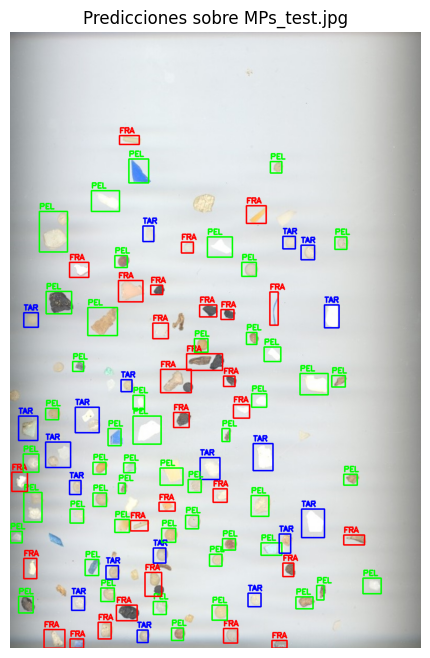

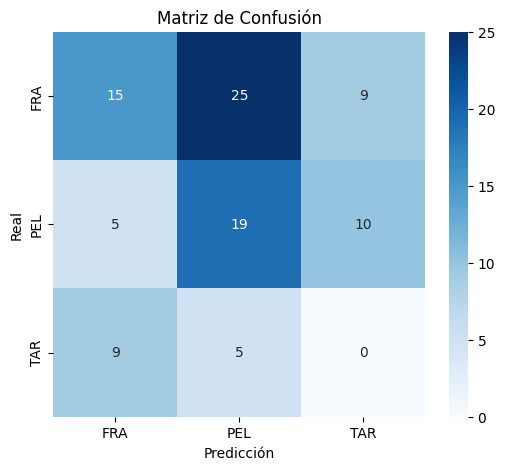

In [58]:
# ============================================================
# 1️⃣ RUTAS DE IMÁGENES
# ============================================================
image_paths = {
    "FRA": [
        "../VC_P3/Resources/Task2/FRA.png",
        "../VC_P3/Resources/Task2/fragment-03-olympus-10-01-2020.JPG"
    ],
    "PEL": [
        "../VC_P3/Resources/Task2/PEL.png",
        "../VC_P3/Resources/Task2/pellet-03-olympus-10-01-2020.JPG"
    ],
    "TAR": [
        "../VC_P3/Resources/Task2/TAR.png",
        "../VC_P3/Resources/Task2/tar-03-olympus-10-01-2020.JPG"
    ]
}

output_dir = "../VC_P3/Resources/Task2/Augmented/"
Path(output_dir).mkdir(parents=True, exist_ok=True)

# ============================================================
# 2️⃣ AUMENTACIÓN DE IMÁGENES (con umbralizado)
# ============================================================
def binarize_image(image, invert=True):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # Invertir si el fondo es blanco y piezas oscuras
    if invert and np.mean(thresh) > 127:
        thresh = cv2.bitwise_not(thresh)
    # Convertir a 3 canales
    return cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)

def generate_images(image):
    # Original y flip horizontal
    variations = [image, cv2.flip(image, 1)]
    aug_images = []

    for img in variations:
        bin_img = binarize_image(img)
        aug_images.append(bin_img)
    
    return aug_images

# Generar imágenes aumentadas
for label, paths in image_paths.items():
    index = 0
    for path in paths:
        image = cv2.imread(path)
        if image is None:
            continue
        aug_images = generate_images(image)
        for i, img in enumerate(aug_images):
            out_path = Path(output_dir) / f"{label}_{index*4+i+1}.png"
            if out_path.exists():
                print(f"⚠️ Sobrescribiendo {out_path}")
            cv2.imwrite(str(out_path), img)  # Sobrescribe automáticamente
        index += 1

print("✅ Imágenes aumentadas generadas y sobrescritas si existían.")

# ============================================================
# 3️⃣ EXTRACCIÓN DE CARACTERÍSTICAS
# ============================================================
def area_calculator(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return sum(cv2.contourArea(c) for c in contours)

def perimeter_calculator(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return sum(cv2.arcLength(c, True) for c in contours)

def extract_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    mean_intensity = np.mean(gray)
    std_intensity = np.std(gray)
    mean_hue = np.mean(hsv[:, :, 0])
    mean_sat = np.mean(hsv[:, :, 1])
    mean_val = np.mean(hsv[:, :, 2])

    # Umbralizado binario para contornos
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        area = perimeter = circularity = aspect_ratio = solidity = 0
    else:
        c = max(contours, key=cv2.contourArea)
        area = cv2.contourArea(c)
        perimeter = cv2.arcLength(c, True)
        x, y, w, h = cv2.boundingRect(c)
        aspect_ratio = w / float(h)
        hull = cv2.convexHull(c)
        hull_area = cv2.contourArea(hull)
        solidity = float(area) / hull_area if hull_area > 0 else 0
        circularity = 4 * np.pi * area / (perimeter ** 2 + 1e-6)

    glcm = graycomatrix(gray, distances=[2], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]

    return [
        mean_intensity, std_intensity,
        mean_hue, mean_sat, mean_val,
        area, perimeter, circularity,
        aspect_ratio, solidity,
        contrast, homogeneity, energy, correlation
    ]

# ============================================================
# 4️⃣ ENTRENAMIENTO DEL RANDOMFOREST
# ============================================================
train_paths = glob.glob(str(Path(output_dir) / "*.png"))
X_train, y_train = [], []

for path in train_paths:
    img = cv2.imread(path)
    if img is None:
        continue
    label = Path(path).stem.split("_")[0].strip().upper()
    X_train.append(extract_features(img))
    y_train.append(label)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

clf = RandomForestClassifier(n_estimators=500, max_depth=25, random_state=42)
clf.fit(X_train_scaled, y_train_enc)

print("✅ RandomForest entrenado.")

# ============================================================
# 5️⃣ CLASIFICADOR HÍBRIDO (REGLAS + RandomForest)
# ============================================================
def predict_hybrid(image, clf, scaler, le, val_thresh=60, circ_thresh=0.8):
    features = extract_features(image)
    mean_val = features[4]
    circularity = features[7]

    if mean_val < val_thresh:
        return "TAR"
    elif circularity > circ_thresh:
        return "PEL"
    else:
        scaled = scaler.transform([features])
        pred = clf.predict(scaled)[0]
        return le.inverse_transform([pred])[0]

# ============================================================
# 6️⃣ EVALUACIÓN SOBRE LA IMAGEN DE TEST
# ============================================================
test_image_path = "../VC_P3/Resources/Task2/MPs_test.jpg"
test_csv_path = "../VC_P3/Resources/Task2/MPs_test_bbs.csv"

test_img = cv2.imread(test_image_path)
bbs = pd.read_csv(test_csv_path)

y_true, y_pred = [], []

for _, row in bbs.iterrows():
    x1, y1, x2, y2 = int(row['x_min']), int(row['y_min']), int(row['x_max']), int(row['y_max'])
    label = row['label'].strip().upper()

    y1 = max(0, y1)
    y2 = min(test_img.shape[0], y2)
    x1 = max(0, x1)
    x2 = min(test_img.shape[1], x2)

    roi = test_img[y1:y2, x1:x2]
    if roi.size == 0:
        continue

    pred = predict_hybrid(roi, clf, scaler, le)
    y_true.append(label)
    y_pred.append(pred)

# ============================================================
# 7️⃣ RESULTADOS
# ============================================================
acc = accuracy_score(y_true, y_pred)
common_labels = sorted(list(set(y_true).intersection(set(le.classes_))))
cm = confusion_matrix(y_true, y_pred, labels=common_labels)

print(f"\n🔹 Accuracy: {acc*100:.2f}%")
print("\nMatriz de confusión:")
print(pd.DataFrame(cm, index=common_labels, columns=common_labels))

# Visualización con cajas de colores
color_map = {"FRA": (0, 0, 255), "PEL": (0, 255, 0), "TAR": (255, 0, 0)}
vis_img = test_img.copy()

for i, row in bbs.iterrows():
    if i >= len(y_pred):
        continue
    x1, y1, x2, y2 = int(row['x_min']), int(row['y_min']), int(row['x_max']), int(row['y_max'])
    label_pred = y_pred[i]
    color = color_map.get(label_pred, (255, 255, 255))
    cv2.rectangle(vis_img, (x1, y1), (x2, y2), color, 2)
    cv2.putText(vis_img, label_pred, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(vis_img, cv2.COLOR_BGR2RGB))
plt.title("Predicciones sobre MPs_test.jpg")
plt.axis("off")
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=common_labels, yticklabels=common_labels)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


✅ Imágenes aumentadas y umbralizadas con adaptativo promedio generadas.
✅ RandomForest entrenado.

🔹 Accuracy: 51.55%

Matriz de confusión:
     FRA  PEL  TAR
FRA   49    0    0
PEL   33    1    0
TAR   14    0    0


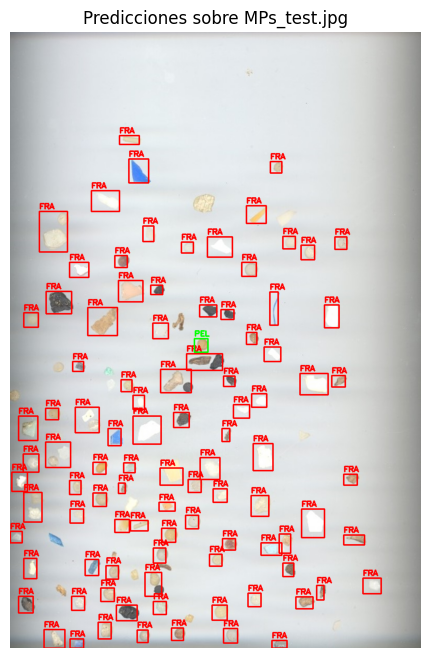

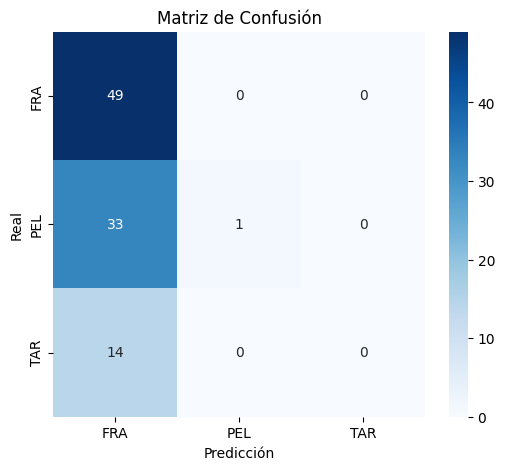

In [ ]:
# ============================================================
# 1️⃣ RUTAS DE IMÁGENES
# ============================================================
image_paths = {
    "FRA": [
        "../VC_P3/Resources/Task2/FRA.png",
        "../VC_P3/Resources/Task2/fragment-03-olympus-10-01-2020.JPG"
    ],
    "PEL": [
        "../VC_P3/Resources/Task2/PEL.png",
        "../VC_P3/Resources/Task2/pellet-03-olympus-10-01-2020.JPG"
    ],
    "TAR": [
        "../VC_P3/Resources/Task2/TAR.png",
        "../VC_P3/Resources/Task2/tar-03-olympus-10-01-2020.JPG"
    ]
}

output_dir = "../VC_P3/Resources/Task2/Augmented/"
Path(output_dir).mkdir(parents=True, exist_ok=True)

# ============================================================
# 2️⃣ FUNCIÓN DE BINARIZADO ADAPTATIVO PROMEDIO
# ============================================================
def binarize_adaptive_mean(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Umbral adaptativo promedio
    bin_img = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                    cv2.THRESH_BINARY, 11, 2)
    # Invertir para fondo negro y piezas blancas
    bin_img = 255 - bin_img
    # Convertir a 3 canales
    return cv2.cvtColor(bin_img, cv2.COLOR_GRAY2BGR)

# ============================================================
# 3️⃣ AUMENTACIÓN DE IMÁGENES
# ============================================================
def generate_images(image):
    variations = [image, cv2.flip(image, 1)]
    aug_images = []
    for img in variations:
        bin_img = binarize_adaptive_mean(img)
        aug_images.append(bin_img)
    return aug_images

# Generar imágenes aumentadas y umbralizadas
for label, paths in image_paths.items():
    index = 0
    for path in paths:
        image = cv2.imread(path)
        if image is None:
            continue
        aug_images = generate_images(image)
        for i, img in enumerate(aug_images):
            out_path = Path(output_dir) / f"{label}_{index*4+i+1}.png"
            cv2.imwrite(str(out_path), img)
        index += 1

print("✅ Imágenes aumentadas y umbralizadas con adaptativo promedio generadas.")

# ============================================================
# 4️⃣ EXTRACCIÓN DE CARACTERÍSTICAS
# ============================================================
def extract_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    mean_intensity = np.mean(gray)
    std_intensity = np.std(gray)
    mean_hue = np.mean(hsv[:, :, 0])
    mean_sat = np.mean(hsv[:, :, 1])
    mean_val = np.mean(hsv[:, :, 2])

    # Umbral adaptativo promedio para contornos
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                   cv2.THRESH_BINARY, 11, 2)
    thresh = 255 - thresh  # fondo negro, piezas blancas

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        area = perimeter = circularity = aspect_ratio = solidity = 0
    else:
        c = max(contours, key=cv2.contourArea)
        area = cv2.contourArea(c)
        perimeter = cv2.arcLength(c, True)
        x, y, w, h = cv2.boundingRect(c)
        aspect_ratio = w / float(h)
        hull = cv2.convexHull(c)
        hull_area = cv2.contourArea(hull)
        solidity = float(area) / hull_area if hull_area > 0 else 0
        circularity = 4 * np.pi * area / (perimeter ** 2 + 1e-6)

    glcm = graycomatrix(gray, distances=[2], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]

    return [
        mean_intensity, std_intensity,
        mean_hue, mean_sat, mean_val,
        area, perimeter, circularity,
        aspect_ratio, solidity,
        contrast, homogeneity, energy, correlation
    ]

# ============================================================
# 5️⃣ ENTRENAMIENTO DEL RANDOMFOREST
# ============================================================
train_paths = glob.glob(str(Path(output_dir) / "*.png"))
X_train, y_train = [], []

for path in train_paths:
    img = cv2.imread(path)
    if img is None:
        continue
    label = Path(path).stem.split("_")[0].strip().upper()
    X_train.append(extract_features(img))
    y_train.append(label)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

clf = RandomForestClassifier(n_estimators=500, max_depth=25, random_state=42)
clf.fit(X_train_scaled, y_train_enc)

print("✅ RandomForest entrenado.")

# ============================================================
# 6️⃣ CLASIFICADOR HÍBRIDO
# ============================================================
def predict_hybrid(image, clf, scaler, le, val_thresh=60, circ_thresh=0.8):
    features = extract_features(image)
    mean_val = features[4]
    circularity = features[7]

    if mean_val < val_thresh:
        return "TAR"
    elif circularity > circ_thresh:
        return "PEL"
    else:
        scaled = scaler.transform([features])
        pred = clf.predict(scaled)[0]
        return le.inverse_transform([pred])[0]

# ============================================================
# 7️⃣ EVALUACIÓN SOBRE LA IMAGEN DE TEST
# ============================================================
test_image_path = "../VC_P3/Resources/Task2/MPs_test.jpg"
test_csv_path = "../VC_P3/Resources/Task2/MPs_test_bbs.csv"

test_img = cv2.imread(test_image_path)
bbs = pd.read_csv(test_csv_path)

y_true, y_pred = [], []

for _, row in bbs.iterrows():
    x1, y1, x2, y2 = int(row['x_min']), int(row['y_min']), int(row['x_max']), int(row['y_max'])
    label = row['label'].strip().upper()

    y1 = max(0, y1)
    y2 = min(test_img.shape[0], y2)
    x1 = max(0, x1)
    x2 = min(test_img.shape[1], x2)

    roi = test_img[y1:y2, x1:x2]
    if roi.size == 0:
        continue

    pred = predict_hybrid(roi, clf, scaler, le)
    y_true.append(label)
    y_pred.append(pred)

# ============================================================
# 8️⃣ RESULTADOS
# ============================================================
acc = accuracy_score(y_true, y_pred)
common_labels = sorted(list(set(y_true).intersection(set(le.classes_))))
cm = confusion_matrix(y_true, y_pred, labels=common_labels)

print(f"\n🔹 Accuracy: {acc*100:.2f}%")
print("\nMatriz de confusión:")
print(pd.DataFrame(cm, index=common_labels, columns=common_labels))

# Visualización con cajas de colores
color_map = {"FRA": (0, 0, 255), "PEL": (0, 255, 0), "TAR": (255, 0, 0)}
vis_img = test_img.copy()

for i, row in bbs.iterrows():
    if i >= len(y_pred):
        continue
    x1, y1, x2, y2 = int(row['x_min']), int(row['y_min']), int(row['x_max']), int(row['y_max'])
    label_pred = y_pred[i]
    color = color_map.get(label_pred, (255, 255, 255))
    cv2.rectangle(vis_img, (x1, y1), (x2, y2), color, 2)
    cv2.putText(vis_img, label_pred, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(vis_img, cv2.COLOR_BGR2RGB))
plt.title("Predicciones sobre MPs_test.jpg")
plt.axis("off")
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=common_labels, yticklabels=common_labels)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


✅ Imágenes aumentadas y umbralizadas con valor fijo generadas.
✅ RandomForest entrenado.

🔹 Accuracy: 42.27%

Matriz de confusión:
     FRA  PEL  TAR
FRA   41    1    7
PEL   31    0    3
TAR   14    0    0


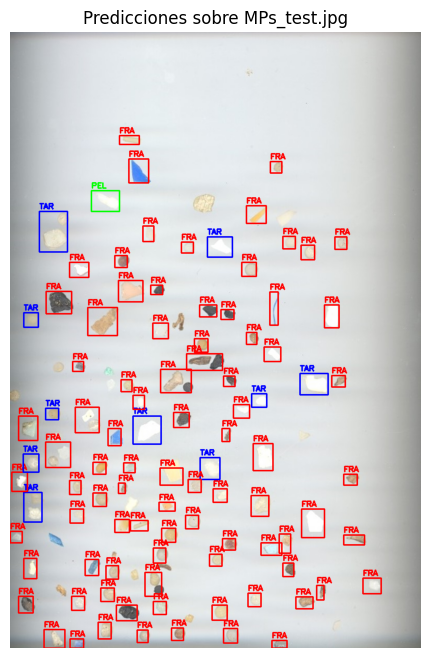

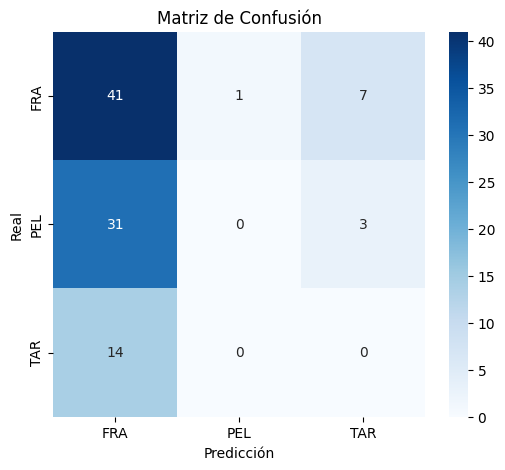

In [ ]:
# ============================================================
# 1️⃣ RUTAS DE IMÁGENES
# ============================================================
image_paths = {
    "FRA": [
        "../VC_P3/Resources/Task2/FRA.png",
        "../VC_P3/Resources/Task2/fragment-03-olympus-10-01-2020.JPG"
    ],
    "PEL": [
        "../VC_P3/Resources/Task2/PEL.png",
        "../VC_P3/Resources/Task2/pellet-03-olympus-10-01-2020.JPG"
    ],
    "TAR": [
        "../VC_P3/Resources/Task2/TAR.png",
        "../VC_P3/Resources/Task2/tar-03-olympus-10-01-2020.JPG"
    ]
}

output_dir = "../VC_P3/Resources/Task2/Augmented/"
Path(output_dir).mkdir(parents=True, exist_ok=True)

# ============================================================
# 2️⃣ FUNCIÓN DE BINARIZADO FIJO
# ============================================================
def binarize_fixed(image, threshold=114):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, bin_img = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)
    return cv2.cvtColor(bin_img, cv2.COLOR_GRAY2BGR)

# ============================================================
# 3️⃣ AUMENTACIÓN DE IMÁGENES
# ============================================================
def generate_images(image):
    variations = [image, cv2.flip(image, 1)]
    aug_images = []
    for img in variations:
        bin_img = binarize_fixed(img)
        aug_images.append(bin_img)
    return aug_images

# Generar imágenes aumentadas y umbralizadas
for label, paths in image_paths.items():
    index = 0
    for path in paths:
        image = cv2.imread(path)
        if image is None:
            continue
        aug_images = generate_images(image)
        for i, img in enumerate(aug_images):
            out_path = Path(output_dir) / f"{label}_{index*4+i+1}.png"
            cv2.imwrite(str(out_path), img)
        index += 1

print("✅ Imágenes aumentadas y umbralizadas con valor fijo generadas.")

# ============================================================
# 4️⃣ EXTRACCIÓN DE CARACTERÍSTICAS
# ============================================================
def extract_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    mean_intensity = np.mean(gray)
    std_intensity = np.std(gray)
    mean_hue = np.mean(hsv[:, :, 0])
    mean_sat = np.mean(hsv[:, :, 1])
    mean_val = np.mean(hsv[:, :, 2])

    # Umbral fijo
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        area = perimeter = circularity = aspect_ratio = solidity = 0
    else:
        c = max(contours, key=cv2.contourArea)
        area = cv2.contourArea(c)
        perimeter = cv2.arcLength(c, True)
        x, y, w, h = cv2.boundingRect(c)
        aspect_ratio = w / float(h)
        hull = cv2.convexHull(c)
        hull_area = cv2.contourArea(hull)
        solidity = float(area) / hull_area if hull_area > 0 else 0
        circularity = 4 * np.pi * area / (perimeter ** 2 + 1e-6)

    glcm = graycomatrix(gray, distances=[2], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]

    return [
        mean_intensity, std_intensity,
        mean_hue, mean_sat, mean_val,
        area, perimeter, circularity,
        aspect_ratio, solidity,
        contrast, homogeneity, energy, correlation
    ]

# ============================================================
# 5️⃣ ENTRENAMIENTO DEL RANDOMFOREST
# ============================================================
train_paths = glob.glob(str(Path(output_dir) / "*.png"))
X_train, y_train = [], []

for path in train_paths:
    img = cv2.imread(path)
    if img is None:
        continue
    label = Path(path).stem.split("_")[0].strip().upper()
    X_train.append(extract_features(img))
    y_train.append(label)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

clf = RandomForestClassifier(n_estimators=500, max_depth=25, random_state=42)
clf.fit(X_train_scaled, y_train_enc)

print("✅ RandomForest entrenado.")

# ============================================================
# 6️⃣ CLASIFICADOR HÍBRIDO
# ============================================================
def predict_hybrid(image, clf, scaler, le, val_thresh=60, circ_thresh=0.8):
    features = extract_features(image)
    mean_val = features[4]
    circularity = features[7]

    if mean_val < val_thresh:
        return "TAR"
    elif circularity > circ_thresh:
        return "PEL"
    else:
        scaled = scaler.transform([features])
        pred = clf.predict(scaled)[0]
        return le.inverse_transform([pred])[0]

# ============================================================
# 7️⃣ EVALUACIÓN SOBRE LA IMAGEN DE TEST
# ============================================================
test_image_path = "../VC_P3/Resources/Task2/MPs_test.jpg"
test_csv_path = "../VC_P3/Resources/Task2/MPs_test_bbs.csv"

test_img = cv2.imread(test_image_path)
bbs = pd.read_csv(test_csv_path)

y_true, y_pred = [], []

for _, row in bbs.iterrows():
    x1, y1, x2, y2 = int(row['x_min']), int(row['y_min']), int(row['x_max']), int(row['y_max'])
    label = row['label'].strip().upper()

    y1 = max(0, y1)
    y2 = min(test_img.shape[0], y2)
    x1 = max(0, x1)
    x2 = min(test_img.shape[1], x2)

    roi = test_img[y1:y2, x1:x2]
    if roi.size == 0:
        continue

    pred = predict_hybrid(roi, clf, scaler, le)
    y_true.append(label)
    y_pred.append(pred)

# ============================================================
# 8️⃣ RESULTADOS
# ============================================================
acc = accuracy_score(y_true, y_pred)
common_labels = sorted(list(set(y_true).intersection(set(le.classes_))))
cm = confusion_matrix(y_true, y_pred, labels=common_labels)

print(f"\n🔹 Accuracy: {acc*100:.2f}%")
print("\nMatriz de confusión:")
print(pd.DataFrame(cm, index=common_labels, columns=common_labels))

# Visualización con cajas de colores
color_map = {"FRA": (0, 0, 255), "PEL": (0, 255, 0), "TAR": (255, 0, 0)}
vis_img = test_img.copy()

for i, row in bbs.iterrows():
    if i >= len(y_pred):
        continue
    x1, y1, x2, y2 = int(row['x_min']), int(row['y_min']), int(row['x_max']), int(row['y_max'])
    label_pred = y_pred[i]
    color = color_map.get(label_pred, (255, 255, 255))
    cv2.rectangle(vis_img, (x1, y1), (x2, y2), color, 2)
    cv2.putText(vis_img, label_pred, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(vis_img, cv2.COLOR_BGR2RGB))
plt.title("Predicciones sobre MPs_test.jpg")
plt.axis("off")
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=common_labels, yticklabels=common_labels)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


✅ Imágenes aumentadas y umbralizadas con adaptativo Gaussiano generadas.
✅ RandomForest entrenado.

🔹 Accuracy: 50.52%

Matriz de confusión:
     FRA  PEL  TAR
FRA   49    0    0
PEL   34    0    0
TAR   14    0    0


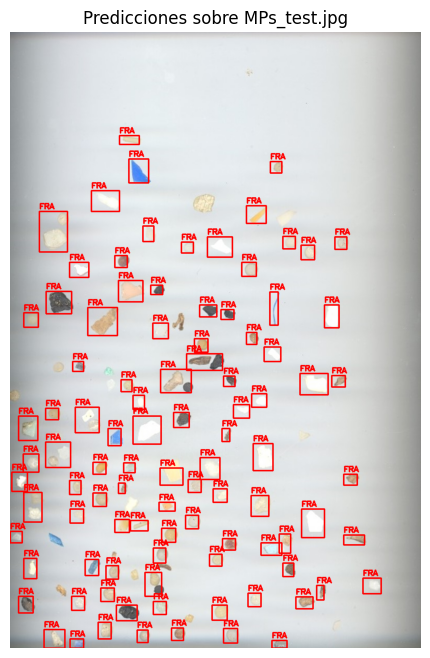

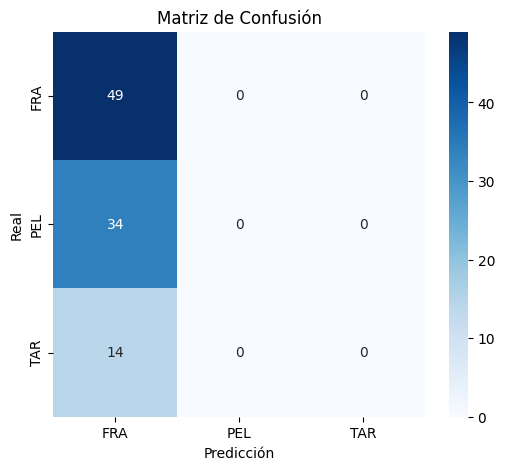

In [ ]:
# ============================================================
# 1️⃣ RUTAS DE IMÁGENES
# ============================================================
image_paths = {
    "FRA": [
        "../VC_P3/Resources/Task2/FRA.png",
        "../VC_P3/Resources/Task2/fragment-03-olympus-10-01-2020.JPG"
    ],
    "PEL": [
        "../VC_P3/Resources/Task2/PEL.png",
        "../VC_P3/Resources/Task2/pellet-03-olympus-10-01-2020.JPG"
    ],
    "TAR": [
        "../VC_P3/Resources/Task2/TAR.png",
        "../VC_P3/Resources/Task2/tar-03-olympus-10-01-2020.JPG"
    ]
}

output_dir = "../VC_P3/Resources/Task2/Augmented/"
Path(output_dir).mkdir(parents=True, exist_ok=True)

# ============================================================
# 2️⃣ FUNCIÓN DE BINARIZADO ADAPTATIVO GAUSSIANO
# ============================================================
def binarize_adaptive_gauss(image, block_size=11, C=2):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    bin_img = cv2.adaptiveThreshold(gray, 255,
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY_INV,
                                    block_size, C)
    return cv2.cvtColor(bin_img, cv2.COLOR_GRAY2BGR)

# ============================================================
# 3️⃣ AUMENTACIÓN DE IMÁGENES
# ============================================================
def generate_images(image):
    variations = [image, cv2.flip(image, 1)]
    aug_images = []
    for img in variations:
        bin_img = binarize_adaptive_gauss(img)
        aug_images.append(bin_img)
    return aug_images

# Generar imágenes aumentadas y umbralizadas
for label, paths in image_paths.items():
    index = 0
    for path in paths:
        image = cv2.imread(path)
        if image is None:
            continue
        aug_images = generate_images(image)
        for i, img in enumerate(aug_images):
            out_path = Path(output_dir) / f"{label}_{index*4+i+1}.png"
            cv2.imwrite(str(out_path), img)
        index += 1

print("✅ Imágenes aumentadas y umbralizadas con adaptativo Gaussiano generadas.")

# ============================================================
# 4️⃣ EXTRACCIÓN DE CARACTERÍSTICAS
# ============================================================
def extract_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    mean_intensity = np.mean(gray)
    std_intensity = np.std(gray)
    mean_hue = np.mean(hsv[:, :, 0])
    mean_sat = np.mean(hsv[:, :, 1])
    mean_val = np.mean(hsv[:, :, 2])

    # Umbral adaptativo Gaussiano
    thresh = cv2.adaptiveThreshold(gray, 255,
                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV,
                                   11, 2)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        area = perimeter = circularity = aspect_ratio = solidity = 0
    else:
        c = max(contours, key=cv2.contourArea)
        area = cv2.contourArea(c)
        perimeter = cv2.arcLength(c, True)
        x, y, w, h = cv2.boundingRect(c)
        aspect_ratio = w / float(h)
        hull = cv2.convexHull(c)
        hull_area = cv2.contourArea(hull)
        solidity = float(area) / hull_area if hull_area > 0 else 0
        circularity = 4 * np.pi * area / (perimeter ** 2 + 1e-6)

    glcm = graycomatrix(gray, distances=[2], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]

    return [
        mean_intensity, std_intensity,
        mean_hue, mean_sat, mean_val,
        area, perimeter, circularity,
        aspect_ratio, solidity,
        contrast, homogeneity, energy, correlation
    ]

# ============================================================
# 5️⃣ ENTRENAMIENTO DEL RANDOMFOREST
# ============================================================
train_paths = glob.glob(str(Path(output_dir) / "*.png"))
X_train, y_train = [], []

for path in train_paths:
    img = cv2.imread(path)
    if img is None:
        continue
    label = Path(path).stem.split("_")[0].strip().upper()
    X_train.append(extract_features(img))
    y_train.append(label)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

clf = RandomForestClassifier(n_estimators=500, max_depth=25, random_state=42)
clf.fit(X_train_scaled, y_train_enc)

print("✅ RandomForest entrenado.")

# ============================================================
# 6️⃣ CLASIFICADOR HÍBRIDO
# ============================================================
def predict_hybrid(image, clf, scaler, le, val_thresh=60, circ_thresh=0.8):
    features = extract_features(image)
    mean_val = features[4]
    circularity = features[7]

    if mean_val < val_thresh:
        return "TAR"
    elif circularity > circ_thresh:
        return "PEL"
    else:
        scaled = scaler.transform([features])
        pred = clf.predict(scaled)[0]
        return le.inverse_transform([pred])[0]

# ============================================================
# 7️⃣ EVALUACIÓN SOBRE LA IMAGEN DE TEST
# ============================================================
test_image_path = "../VC_P3/Resources/Task2/MPs_test.jpg"
test_csv_path = "../VC_P3/Resources/Task2/MPs_test_bbs.csv"

test_img = cv2.imread(test_image_path)
bbs = pd.read_csv(test_csv_path)

y_true, y_pred = [], []

for _, row in bbs.iterrows():
    x1, y1, x2, y2 = int(row['x_min']), int(row['y_min']), int(row['x_max']), int(row['y_max'])
    label = row['label'].strip().upper()

    y1 = max(0, y1)
    y2 = min(test_img.shape[0], y2)
    x1 = max(0, x1)
    x2 = min(test_img.shape[1], x2)

    roi = test_img[y1:y2, x1:x2]
    if roi.size == 0:
        continue

    pred = predict_hybrid(roi, clf, scaler, le)
    y_true.append(label)
    y_pred.append(pred)

# ============================================================
# 8️⃣ RESULTADOS
# ============================================================
acc = accuracy_score(y_true, y_pred)
common_labels = sorted(list(set(y_true).intersection(set(le.classes_))))
cm = confusion_matrix(y_true, y_pred, labels=common_labels)

print(f"\n🔹 Accuracy: {acc*100:.2f}%")
print("\nMatriz de confusión:")
print(pd.DataFrame(cm, index=common_labels, columns=common_labels))

# Visualización con cajas de colores
color_map = {"FRA": (0, 0, 255), "PEL": (0, 255, 0), "TAR": (255, 0, 0)}
vis_img = test_img.copy()

for i, row in bbs.iterrows():
    if i >= len(y_pred):
        continue
    x1, y1, x2, y2 = int(row['x_min']), int(row['y_min']), int(row['x_max']), int(row['y_max'])
    label_pred = y_pred[i]
    color = color_map.get(label_pred, (255, 255, 255))
    cv2.rectangle(vis_img, (x1, y1), (x2, y2), color, 2)
    cv2.putText(vis_img, label_pred, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(vis_img, cv2.COLOR_BGR2RGB))
plt.title("Predicciones sobre MPs_test.jpg")
plt.axis("off")
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=common_labels, yticklabels=common_labels)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


✅ Imágenes aumentadas y umbralizadas con adaptativo Gaussiano generadas.
✅ RandomForest entrenado.

🔹 Accuracy: 26.80%

Matriz de confusión:
     FRA  PEL  TAR
FRA   18   26    5
PEL   26    7    1
TAR    6    7    1


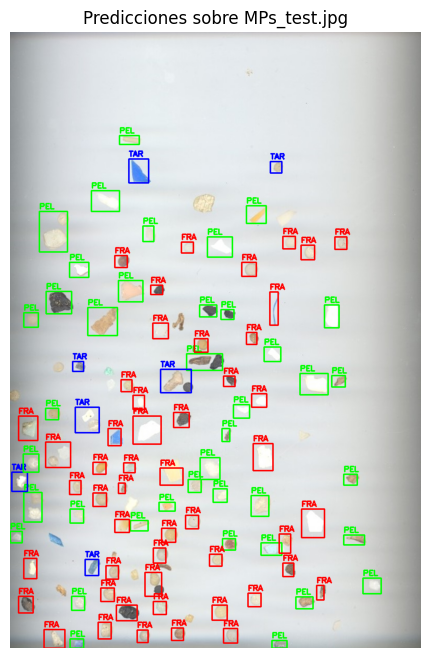

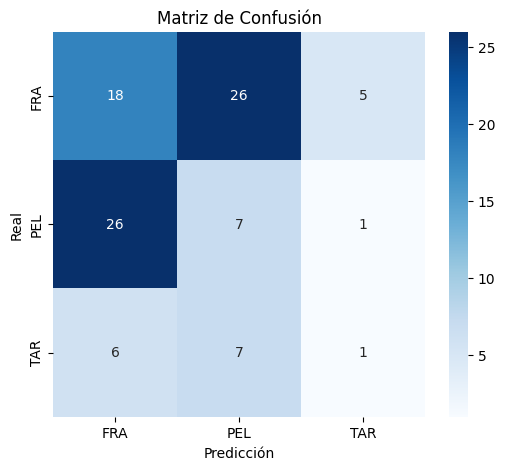

In [ ]:
# ============================================================
# 1️⃣ RUTAS DE IMÁGENES
# ============================================================
image_paths = {
    "FRA": [
        "../VC_P3/Resources/Task2/FRA.png",
        "../VC_P3/Resources/Task2/fragment-03-olympus-10-01-2020.JPG"
    ],
    "PEL": [
        "../VC_P3/Resources/Task2/PEL.png",
        "../VC_P3/Resources/Task2/pellet-03-olympus-10-01-2020.JPG"
    ],
    "TAR": [
        "../VC_P3/Resources/Task2/TAR.png",
        "../VC_P3/Resources/Task2/tar-03-olympus-10-01-2020.JPG"
    ]
}

output_dir = "../VC_P3/Resources/Task2/Augmented/"
Path(output_dir).mkdir(parents=True, exist_ok=True)

# ============================================================
# 2️⃣ FUNCIÓN DE BINARIZADO ADAPTATIVO GAUSSIANO
# ============================================================
def binarize_adaptive_gauss(image, block_size=11, C=2):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    bin_img = cv2.adaptiveThreshold(gray, 255,
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY_INV,
                                    block_size, C)
    return cv2.cvtColor(bin_img, cv2.COLOR_GRAY2BGR)

# ============================================================
# 3️⃣ AUMENTACIÓN DE IMÁGENES (Flips + Rotaciones + Umbralizado)
# ============================================================
def generate_images(image):
    variations = [image, cv2.flip(image, 1)]
    for angle in [15, -15]:
        (h, w) = image.shape[:2]
        M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1.0)
        rotated = cv2.warpAffine(image, M, (w, h))
        variations.append(rotated)
    
    aug_images = []
    for img in variations:
        bin_img = binarize_adaptive_gauss(img)
        aug_images.append(bin_img)
    return aug_images

# ============================================================
# 4️⃣ GENERAR Y GUARDAR IMÁGENES AUMENTADAS
# ============================================================
for label, paths in image_paths.items():
    index = 0
    for path in paths:
        image = cv2.imread(path)
        if image is None:
            continue
        aug_images = generate_images(image)
        for i, img in enumerate(aug_images):
            out_path = Path(output_dir) / f"{label}_{index*4+i+1}.png"
            cv2.imwrite(str(out_path), img)
        index += 1

print("✅ Imágenes aumentadas y umbralizadas con adaptativo Gaussiano generadas.")

# ============================================================
# 5️⃣ EXTRACCIÓN DE CARACTERÍSTICAS
# ============================================================
def extract_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    mean_intensity = np.mean(gray)
    std_intensity = np.std(gray)
    mean_hue = np.mean(hsv[:, :, 0])
    mean_sat = np.mean(hsv[:, :, 1])
    mean_val = np.mean(hsv[:, :, 2])

    thresh = cv2.adaptiveThreshold(gray, 255,
                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV,
                                   11, 2)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        area = perimeter = circularity = aspect_ratio = solidity = 0
    else:
        c = max(contours, key=cv2.contourArea)
        area = cv2.contourArea(c)
        perimeter = cv2.arcLength(c, True)
        x, y, w, h = cv2.boundingRect(c)
        aspect_ratio = w / float(h)
        hull = cv2.convexHull(c)
        hull_area = cv2.contourArea(hull)
        solidity = float(area) / hull_area if hull_area > 0 else 0
        circularity = 4 * np.pi * area / (perimeter ** 2 + 1e-6)

    glcm = graycomatrix(gray, distances=[2], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]


# ============================================================
# 1️⃣ RUTAS DE IMÁGENES
# ============================================================
image_paths = {
    "FRA": [
        "../VC_P3/Resources/Task2/FRA.png",
        "../VC_P3/Resources/Task2/fragment-03-olympus-10-01-2020.JPG"
    ],
    "PEL": [
        "../VC_P3/Resources/Task2/PEL.png",
        "../VC_P3/Resources/Task2/pellet-03-olympus-10-01-2020.JPG"
    ],
    "TAR": [
        "../VC_P3/Resources/Task2/TAR.png",
        "../VC_P3/Resources/Task2/tar-03-olympus-10-01-2020.JPG"
    ]
}

output_dir = "../VC_P3/Resources/Task2/Augmented/"
Path(output_dir).mkdir(parents=True, exist_ok=True)

# ============================================================
# 2️⃣ FUNCIÓN DE BINARIZADO ADAPTATIVO GAUSSIANO
# ============================================================
def binarize_fixed(image, threshold=114):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, bin_img = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)
    return cv2.cvtColor(bin_img, cv2.COLOR_GRAY2BGR)

# ============================================================
# 3️⃣ AUMENTACIÓN DE IMÁGENES (Flips + Rotaciones + Umbralizado)
# ============================================================
def generate_images(image):
    variations = [image, cv2.flip(image, 1)]  # Original + flip horizontal
    # Rotaciones leves
    for angle in [15, -15]:
        (h, w) = image.shape[:2]
        M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1.0)
        rotated = cv2.warpAffine(image, M, (w, h))
        variations.append(rotated)
    
    aug_images = []
    for img in variations:
        bin_img = binarize_adaptive_gauss(img)
        aug_images.append(bin_img)
    return aug_images

# ============================================================
# 4️⃣ GENERAR Y GUARDAR IMÁGENES AUMENTADAS
# ============================================================
for label, paths in image_paths.items():
    index = 0
    for path in paths:
        image = cv2.imread(path)
        if image is None:
            continue
        aug_images = generate_images(image)
        for i, img in enumerate(aug_images):
            out_path = Path(output_dir) / f"{label}_{index*4+i+1}.png"
            cv2.imwrite(str(out_path), img)
        index += 1

print("✅ Imágenes aumentadas y umbralizadas con adaptativo Gaussiano generadas.")

# ============================================================
# 5️⃣ EXTRACCIÓN DE CARACTERÍSTICAS
# ============================================================
def extract_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    mean_intensity = np.mean(gray)
    std_intensity = np.std(gray)
    mean_hue = np.mean(hsv[:, :, 0])
    mean_sat = np.mean(hsv[:, :, 1])
    mean_val = np.mean(hsv[:, :, 2])

    # Umbral adaptativo Gaussiano
    thresh = cv2.adaptiveThreshold(gray, 255,
                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV,
                                   11, 2)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        area = perimeter = circularity = aspect_ratio = solidity = 0
    else:
        c = max(contours, key=cv2.contourArea)
        area = cv2.contourArea(c)
        perimeter = cv2.arcLength(c, True)
        x, y, w, h = cv2.boundingRect(c)
        aspect_ratio = w / float(h)
        hull = cv2.convexHull(c)
        hull_area = cv2.contourArea(hull)
        solidity = float(area) / hull_area if hull_area > 0 else 0
        circularity = 4 * np.pi * area / (perimeter ** 2 + 1e-6)

    glcm = graycomatrix(gray, distances=[2], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]

    return [
        mean_intensity, std_intensity,
        mean_hue, mean_sat, mean_val,
        area, perimeter, circularity,
        aspect_ratio, solidity,
        contrast, homogeneity, energy, correlation
    ]

# ============================================================
# 6️⃣ ENTRENAMIENTO DEL RANDOMFOREST
# ============================================================
train_paths = glob.glob(str(Path(output_dir) / "*.png"))
X_train, y_train = [], []

for path in train_paths:
    img = cv2.imread(path)
    if img is None:
        continue
    label = Path(path).stem.split("_")[0].strip().upper()
    X_train.append(extract_features(img))
    y_train.append(label)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

clf = RandomForestClassifier(n_estimators=500, max_depth=25, random_state=42)
clf.fit(X_train_scaled, y_train_enc)

print("✅ RandomForest entrenado.")

# ============================================================
# 7️⃣ CLASIFICADOR HÍBRIDO
# ============================================================
def predict_hybrid(image, clf, scaler, le, val_thresh=60, circ_thresh=0.8):
    features = extract_features(image)
    mean_val = features[4]
    circularity = features[7]

    if mean_val < val_thresh:
        return "TAR"
    elif circularity > circ_thresh:
        return "PEL"
    else:
        scaled = scaler.transform([features])
        pred = clf.predict(scaled)[0]
        return le.inverse_transform([pred])[0]

# ============================================================
# 8️⃣ EVALUACIÓN SOBRE LA IMAGEN DE TEST
# ============================================================
test_image_path = "../VC_P3/Resources/Task2/MPs_test.jpg"
test_csv_path = "../VC_P3/Resources/Task2/MPs_test_bbs.csv"

test_img = cv2.imread(test_image_path)
bbs = pd.read_csv(test_csv_path)

y_true, y_pred = [], []

for _, row in bbs.iterrows():
    x1, y1, x2, y2 = int(row['x_min']), int(row['y_min']), int(row['x_max']), int(row['y_max'])
    label = row['label'].strip().upper()

    y1 = max(0, y1)
    y2 = min(test_img.shape[0], y2)
    x1 = max(0, x1)
    x2 = min(test_img.shape[1], x2)

    roi = test_img[y1:y2, x1:x2]
    if roi.size == 0:
        continue

    pred = predict_hybrid(roi, clf, scaler, le)
    y_true.append(label)
    y_pred.append(pred)

# ============================================================
# 9️⃣ RESULTADOS
# ============================================================
acc = accuracy_score(y_true, y_pred)
common_labels = sorted(list(set(y_true).intersection(set(le.classes_))))
cm = confusion_matrix(y_true, y_pred, labels=common_labels)

print(f"\n🔹 Accuracy: {acc*100:.2f}%")
print("\nMatriz de confusión:")
print(pd.DataFrame(cm, index=common_labels, columns=common_labels))

# Visualización con cajas de colores
color_map = {"FRA": (0, 0, 255), "PEL": (0, 255, 0), "TAR": (255, 0, 0)}
vis_img = test_img.copy()

for i, row in bbs.iterrows():
    if i >= len(y_pred):
        continue
    x1, y1, x2, y2 = int(row['x_min']), int(row['y_min']), int(row['x_max']), int(row['y_max'])
    label_pred = y_pred[i]
    color = color_map.get(label_pred, (255, 255, 255))
    cv2.rectangle(vis_img, (x1, y1), (x2, y2), color, 2)
    cv2.putText(vis_img, label_pred, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(vis_img, cv2.COLOR_BGR2RGB))
plt.title("Predicciones sobre MPs_test.jpg")
plt.axis("off")
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=common_labels, yticklabels=common_labels)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()
